# PARETO - Strategic Model Tracking Water Quality and Sensitivity Analysis
The purpose of this Jupyter notebook is to provide an overview of the features which comprise the water quality and water treatment module within PARETO's strategic model, and to show PARETO advanced capabilities for produced water networks with water quality limitations. 

## Water Quality Challenges in Practice: 
In daily operations, water quality is important to minimize corrosion, scaling, and sulfate issues. While in the long term, water quality can be used to determine treatment technology selection and/or performance. 
 
PARETO water quality helps: 
- tracking constituent propagation
- capturing water quality fluctuations
- water management / water blending to meet certain specifications

This notebook demonstrates PARETO capabilities to track water quality and to re-design the produced water network to minimize TDS in specific locations in the network.

The rest of this demonstration is organized as follows:
1. [Water quality module data requirements](#data)
2. [Set up and solve Pyomo model](#solve)
3. [Sensitivity analysis](#sensitivity)
4. [Add additional constraints to the model](#additional_constraints)

## Case Study
This demo is based on PARETO's strategic toy case study. Relevant links:
- [Strategic model documentation](https://pareto.readthedocs.io/en/latest/model_library/strategic_water_management/index.html)
- [Documentation of PARETO case studies](https://pareto.readthedocs.io/en/latest/case_studies/index.html)

The strategic toy case study features a small produced water network, but realistic produced water network. The size of this example makes it useful for testing, debugging, demonstrations, etc. Below is a schematic image of the strategic toy network:

![Strategic toy case study network](./strategic_toy_network.png)


## <a id='data'></a> 1. Water quality module data requirements

In order to track water quality, water quality for inlet flows is required:  
- Storage initial water quality
- Pad water quality (production and completions pads)
- Desalination technologies

### Storage initial water quality
In tab "StorageInitialWaterQuality", specify the initial quality of the water in each storage site:

![Storage initial quality](./data_input_storage_initial_quality.png)

### Pad storage initial water quality
In tab "PadStorageInitialWaterQuality", specify the initial quality of the water at the built-in storage at each completions pad:

![Pad storage initial quality](./data_input_pad_storage_initial_quality.png)

### Pad water quality
In tab "PadWaterQuality", specify the concentration of each quality component in the produced water which comes from each production pad and completions pad:

![Pad water quality](./data_input_pad_water_quality.png)

IMPORTANT: The column header(s) in this tab are used to specify the quality components that are part of the model. That is, there is not a separate tab to specify the quality components. In the above screenshot, there is only one quality component (TDS).

### Treatment technologies
Since our objective is to minimize TDS concentration to the desalinatino technologies, this case study includes the option to install different desalination technologies:

![Treatment technologies](./data_input_treatment_technologies.png)

In the above list, the abbreviations stand for the following treatment technologies:
- CB: Clean brine. This is a catch-all term meant to refer to any non-desalination treatment technology. 
- CB-EV: Clean brine with enhanced evaporation. Clean brine treatment, but also includes specailized equipment used to increase the rate of evaporation of wastewater from a storage pond into the atmosphere.
- MVC: Mechanical vapor compression desalination.
- MD: Membrane distillation desalination.
- OARO: Osmotically assisted reverse osmosis desalination.

For a detailed description of the inputs required to run this cases study, please visit PARETO case study documentation. Link here

## <a id='solve'></a> 2. Set up and solve Pyomo model
The following code creates and solves the Pyomo model and exports the optimization results to an Excel workbook:

In [2]:
#####################################################################################################
# PARETO was produced under the DOE Produced Water Application for Beneficial Reuse Environmental
# Impact and Treatment Optimization (PARETO), and is copyright (c) 2021-2023 by the software owners:
# The Regents of the University of California, through Lawrence Berkeley National Laboratory, et al.
# All rights reserved.
#
# NOTICE. This Software was developed under funding from the U.S. Department of Energy and the U.S.
# Government consequently retains certain rights. As such, the U.S. Government has been granted for
# itself and others acting on its behalf a paid-up, nonexclusive, irrevocable, worldwide license in
# the Software to reproduce, distribute copies to the public, prepare derivative works, and perform
# publicly and display publicly, and to permit others to do so.
#####################################################################################################

from pareto.strategic_water_management.strategic_produced_water_optimization import (
    WaterQuality,
    create_model,
    Objectives,
    solve_model,
    PipelineCost,
    PipelineCapacity,
)
from pareto.utilities.get_data import get_data
from pareto.utilities.results import (
    generate_report,
    PrintValues,
    OutputUnits,
    is_feasible,
    nostdout,
)
from importlib import resources
from pyomo.environ import Constraint, value, units

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from ipywidgets import FloatText, Button, Layout, GridspecLayout, ToggleButtons
from IPython.display import display

from os import remove

# Load data from Excel input file into Python
with resources.path(
    "pareto.case_studies",
    "strategic_toy_case_study.xlsx",
) as fpath:
    [df_sets, df_parameters] = get_data(fpath)

# Create Pyomo optimization model representing the produced water network
strategic_model = create_model(
    df_sets,
    df_parameters,
    default={
        "objective": Objectives.cost,
        "pipeline_cost": PipelineCost.distance_based,
        "pipeline_capacity": PipelineCapacity.input,
        "node_capacity": True,
        "water_quality": WaterQuality.post_process,
    },
)

# Solve Pyomo model with specified options
options = {
    "deactivate_slacks": True,
    "scale_model": False,
    "scaling_factor": 1000000,
    "running_time": 300,
    "gap": 0,
    "gurobi_numeric_focus": 1,
}
results_obj = solve_model(model=strategic_model, options=options)

# Check feasibility of the solved model
def check_feasibility(model):
    with nostdout():
        feasibility_status = is_feasible(model)
    if not feasibility_status:
        print("Model results are not feasible and should not be trusted")
    else:
        print("Model results validated and found to pass feasibility tests")

check_feasibility(strategic_model)

[model, results_dict] = generate_report(
    strategic_model,
    # is_print=[PrintValues.essential],
    output_units=OutputUnits.user_units,
    fname="strategic_optimization_results_SRA_post_process.xlsx",
)

C:\Users\javal\AppData\Local\Temp\ipykernel_35372\1513010425.py:46: UserWarning: Invalid PARETO input has been provided. Check that the input tab names match valid PARETO input. If you'd like to read custom tabs (e.g., PARETO output files), please pass a list of the custom tab names to get_data(). The following tabs are not standard PARETO inputs for the selected model type: ['ProductionTanks']
  [df_sets, df_parameters] = get_data(fpath)
Loading failed for sheet 'RKA': ValueError('Passed header=[1], len of 1, but only 1 lines in file (sheet: RKA)')
Loading failed for sheet 'RKT': ValueError('Passed header=[1], len of 1, but only 1 lines in file (sheet: RKT)')
c:\users\javal\desktop\internship\pareto\project-pareto_forked\pareto\utilities\get_data.py:287: UserWarning: Data loading failed for the following sheets: 
	RKA	Passed header=[1], len of 1, but only 1 lines in file (sheet: RKA)
	RKT	Passed header=[1], len of 1, but only 1 lines in file (sheet: RKT)
This may be because the sheets

Setting currency to: USD
Model solved using gurobi_direct


**************************************************
                Solving unscaled model
**************************************************
Set parameter TimeLimit to value 300
Set parameter MIPGap to value 0
Set parameter NumericFocus to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 16162 rows, 116631 columns and 61003 nonzeros
Model fingerprint: 0x7a6f354a
Variable types: 77883 continuous, 38748 integer (38748 binary)
Coefficient statistics:
  Matrix range     [1e-04, 4e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 11100 rows and 112880 columns
Presolve time: 0.13s
Presolved: 5062 rows, 3751 columns, 22435 nonzeros
Variable types: 310

### 2.1 Strategic model results (minimize cost)


In [3]:
# Function to extract R01 buildout results
def get_R01_results(results_dict):
    for datapt in results_dict['vb_y_Treatment_dict'][1:]:
        site, technology, capacity, built = datapt
        if site == 'R01' and built == 1:
            return technology, capacity

# Extract R01 buildout results for default solved model
technology, capacity = get_R01_results(results_dict)
print('For this case, PARETO recommends installing a desalination plant in R01 location')
print(f"Technology: {technology}")
print(f"Capacity: {capacity}")
print(f"Objective function value: {value(strategic_model.v_Z)}")

# Check what capacity J1 corresponds to (in bbl/day) 
print('Desalination plant capacity bbl/day =', df_parameters["TreatmentCapacityIncrements"][("MVC", 'J1')])


For this case, PARETO recommends installing a desalination plant in R01 location
Technology: MVC
Capacity: J2
Objective function value: 6122.517820955121
Desalination plant capacity bbl/day = 10000


p_nu_pad : Water Quality at pad [concentration]
    Size=5, Index=s_P*s_QC, Domain=Any, Default=0, Mutable=True, Units=kg/l
    Key             : Value
    ('CP01', 'TDS') :            0.165376
    ('PP01', 'TDS') :            0.142277
    ('PP02', 'TDS') : 0.14099799999999998
    ('PP03', 'TDS') :           0.1724902
    ('PP04', 'TDS') : 0.25754699999999997


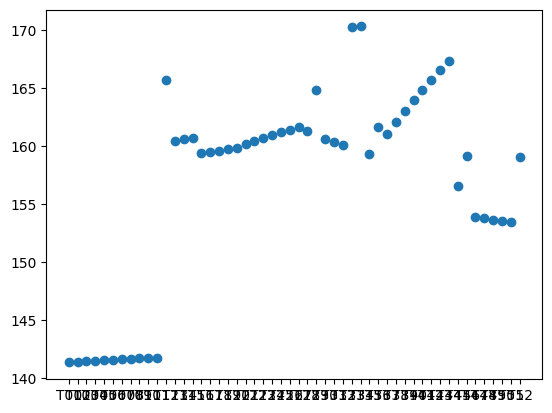

In [4]:
strategic_model.quality.p_nu_pad.display()

time_period = []
TDS = []
for i in strategic_model.s_T:
    TDS.append(1000*value(strategic_model.quality.v_Q['R01', 'TDS',i]))
    time_period.append(i)

from pareto.utilities.results import plot_sankey
args = {"plot_title": "Trucked Water",
       "output_file": "min_cost_solution.html"
       }

input_data = {"pareto_var": results_dict["v_F_Piped_dict"], 
             }
args = {"plot_title": "Trucked Water",
       "output_file": "Trucked_min_cost_solution.html"
       }

input_data = {"pareto_var": results_dict["v_F_Trucked_dict"], 
             }

plot_sankey(input_data, args)

import matplotlib.pyplot as plt
plt.scatter(time_period, TDS)
plt.show()

## <a id='sensitivity'></a> Water quality limitations
To perform sensitivity analysis, we can change model data and then re-solve the model to see the effects on the optimal solution. To demonstrate, we will change some of the costing data associated with desalination technologies to see the effect on which technology gets selected for site R01.

First, we extract results on treatment buildout at R01 from our solved model:

In [5]:
from pareto.utilities.model_modifications import free_variables, deactivate_slacks

# Step 2.1: unfix variables (MILP model)
discrete_variables_names = {"v_X"} 
free_variables(strategic_model, discrete_variables_names)
deactivate_slacks(strategic_model)
strategic_model.quality.objective.deactivate()
strategic_model.CostObjectiveFunction.deactivate()

from pyomo.environ import Constraint, Objective, minimize, SolverFactory, Param
strategic_model.penalty = Param(initialize=1,mutable=True)
from pareto.utilities.solvers import get_solver, set_timeout
def CostObjectiveFunctionRule2(model):
            return model.v_Z == (
                model.v_C_TotalSourced
                + model.v_C_TotalDisposal
                + model.v_C_TotalTreatment
                + model.v_C_TotalReuse
                + model.v_C_TotalPiping
                + model.v_C_TotalStorage
                + model.v_C_TotalTrucking
                + model.p_alpha_AnnualizationRate
                * (
                    model.v_C_DisposalCapEx
                    + model.v_C_StorageCapEx
                    + model.v_C_TreatmentCapEx
                    + model.v_C_PipelineCapEx
                )
                + model.v_C_Slack
                - model.v_R_TotalStorage
                + model.penalty*sum(model.quality.v_Q['R01', w, t] for w in model.s_QC for t in model.s_T)
            )

strategic_model.ObjectiveFunction = Constraint(
            rule=CostObjectiveFunctionRule2, doc="MINLP objective function"
        )

minlp_solver_source = 'gurobi'
if minlp_solver_source == "gams":
    mathoptsolver = "dicopt"
    solver_options = {
        "tol": 1e-3,
        "max_iter": 1000,
        "constr_viol_tol": 0.009,
        "acceptable_constr_viol_tol": 0.01,
        "acceptable_tol": 1e-6,
        "mu_strategy": "adaptive",
        "mu_init": 1e-10,
        "mu_max": 1e-1,
        "print_user_options": "yes",
        "warm_start_init_point": "yes",
        "warm_start_mult_bound_push": 1e-60,
        "warm_start_bound_push": 1e-60,
        #   'linear_solver': 'ma27',
        #   'ma57_pivot_order': 4
    }
    import os

    if not os.path.exists("temp"):
        os.makedirs("temp")

    with open("temp/" + mathoptsolver + ".opt", "w") as f:
        for k, v in solver_options.items():
            f.write(str(k) + " " + str(v) + "\n")

    results = SolverFactory(minlp_solver_source).solve(
        strategic_model,
        tee=True,
        keepfiles=True,
        solver=mathoptsolver,
        tmpdir="temp",
        add_options=["gams_model.optfile=1;"],
    )

elif minlp_solver_source == "gurobi":
    print("solving with GUROBI")
    mathoptsolver = 'gurobi'
    solver = SolverFactory(mathoptsolver)
    solver.options["timeLimit"] = 1500
    solver.options["NonConvex"] = 2
    solver.options["MIPGap"] = 0.5

    results = solver.solve(strategic_model, tee=False, warmstart=True)


elif minlp_solver_source == "baron":
    solver = SolverFactory("baron")
    results = solver.solve(strategic_model, tee=False)

elif minlp_solver_source == 'ipopt':
    solver = get_solver('ipopt')
    solver.options['maxiter'] = 100
    results = solver.solve(strategic_model, tee=False)

AttributeError: 'ConcreteModel' object has no attribute 'CostObjectiveFunction'

After solving the problem to minimize the inlet feed TDS concentration at R01, the optimizer has chonsen to build MVC desalination again. However, as it can be observed in the plot, the TDS concentration is lower. 

For this case, PARETO recommends installing a desalination plant in R01 location
Technology: MVC
Capacity: J1
Objective function value: 16195.130799507127
Desalination plant capacity bbl/day = 10000


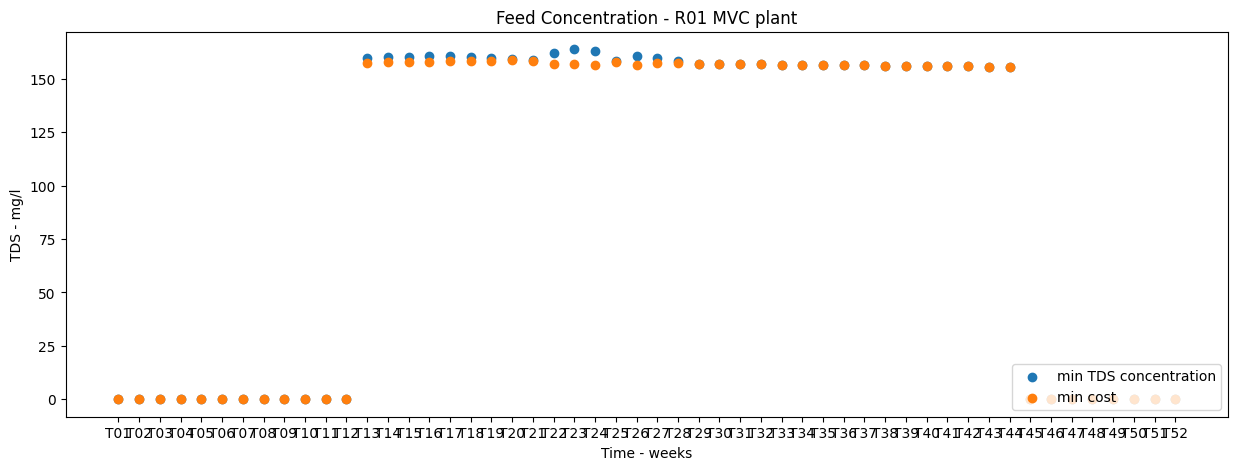

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'link': {'source': [], 'target': [], 'value': []},
              'node': {'label': [], 'line': {'color': 'black', 'width': 0.5}, 'pad': 30, 'thickness': 15},
              'type': 'sankey'}],
    'layout': {'font': {'size': 20},
               'template': '...',
               'title': {'font': {'size': 40}, 'text': 'Trucked Water', 'x': 0.5}}
})

In [ ]:
# Extract R01 buildout results for default solved model
technology, capacity = get_R01_results(results_dict)
print('For this case, PARETO recommends installing a desalination plant in R01 location')
print(f"Technology: {technology}")
print(f"Capacity: {capacity}")
print(f"Objective function value: {value(strategic_model.v_Z)}")

# Check what capacity J1 corresponds to (in bbl/day) 
print('Desalination plant capacity bbl/day =', df_parameters["TreatmentCapacityIncrements"][("MVC", 'J1')])

TDS_reopt = []
time = []
for i in strategic_model.s_T:
    TDS_reopt.append(1000*value(strategic_model.quality.v_Q['R01', 'TDS',i]))
    time.append(i)

plt.rcParams['figure.figsize'] = [15, 5]
plt.title("Feed Concentration - R01 MVC plant")
plt.scatter(time, TDS_reopt, label='min TDS concentration')
plt.xlabel("Time - weeks")
plt.ylabel("TDS - mg/l")
plt.scatter(time, TDS, label='min cost')
plt.legend(loc='lower right')
plt.show()

args = {"plot_title": "Piped Water",
       "output_file": "Piped_min_TDS_solution.html"
       }

input_data = {"pareto_var": results_dict["v_F_Piped_dict"], 
             }

args = {"plot_title": "Trucked Water",
       "output_file": "Trucked_min_TDS_solution.html"
       }

input_data = {"pareto_var": results_dict["v_F_Trucked_dict"], 
             }
plot_sankey(input_data, args)

As it can be observed, PARETO blended water and re-routed high concentration produced water to clean brine site and sent produced water with lower TDS levels to the desalination plant. As expected, this solution affected the overall network cost (both opex and capex).

1. Change name to rtn
2. Doc strings 
3. Errors check on data 
4. check data with daniel 
5. Ask hector to get on board. 